In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import re
import numpy as np

plt.rc('font', family='DejaVu Sans')

# Set the style to 'ggplot', which is popular for its simple and aesthetically pleasing visuals
plt.style.use('seaborn-whitegrid')
plt.rcParams["axes.edgecolor"] = 'black'
plt.rcParams["axes.linewidth"]  = 1.5

# Set the default color cycle to a visually distinct set of colors
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"])

# Increase the default font size for readability
mpl.rcParams['font.size'] = 22

# Set a font family that is commonly available and readable
mpl.rcParams['font.family'] = 'DejaVu Sans'

# Set the figure size to a reasonable default
mpl.rcParams['figure.figsize'] = (10, 6)

# Use a tight layout to make better use of space
mpl.rcParams['figure.autolayout'] = True

# Set the dpi (dots per inch) higher for better quality images
mpl.rcParams['figure.dpi'] = 100

# Increase the default size of plot elements (lines, markers, etc.)
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.markersize'] = 7

# Adjust the appearance of legends
mpl.rcParams['legend.frameon'] = True  # Enable frame
mpl.rcParams['legend.framealpha'] = 0.7  # Set frame transparency
mpl.rcParams['legend.fancybox'] = True  # Enable rounded corners

# Adjust the axes
mpl.rcParams['axes.labelsize'] = 'medium'  # Increase the size of axis labels
mpl.rcParams['axes.titlesize'] = 'x-large'  # Increase the size of the axis title
mpl.rcParams['axes.grid'] = True  # Enable grid for better readability

# Adjust tick marks for both axes
mpl.rcParams['xtick.labelsize'] = 'medium'
mpl.rcParams['ytick.labelsize'] = 'medium'

# Save settings for high-quality outputs
mpl.rcParams['savefig.dpi'] = 300  # High dpi for better image quality
mpl.rcParams['savefig.format'] = 'png'  # Set default save format to PNG

C:\Users\Zhen Guo\AppData\Local\Temp\ipykernel_17532\717155324.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [2]:
from matplotlib.ticker import MaxNLocator

# Function to format y-axis values to two significant figures
def format_yaxis(ax):
    ax.yaxis.set_major_locator(MaxNLocator(nbins='auto', steps=[1, 2, 5, 10]))
    y_labels = ax.get_yticks()
    ax.set_yticklabels(['{:.2f}'.format(y) for y in y_labels])

[('20000', '1', '0.283', '0.203'), ('20000', '2', '0.205', '0.169'), ('20000', '3', '0.220', '0.184'), ('40000', '1', '0.366', '0.261'), ('40000', '2', '0.280', '0.226'), ('40000', '3', '0.198', '0.174'), ('80000', '1', '0.454', '0.341'), ('80000', '2', '0.348', '0.287'), ('80000', '3', '0.242', '0.208'), ('100664', '1', '0.482', '0.348'), ('100664', '2', '0.353', '0.287'), ('100664', '3', '0.260', '0.217')]


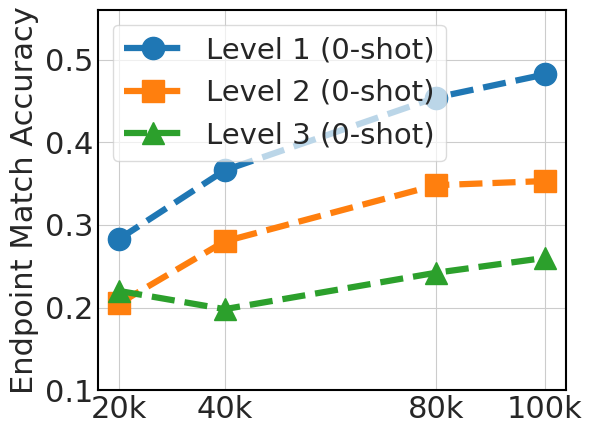

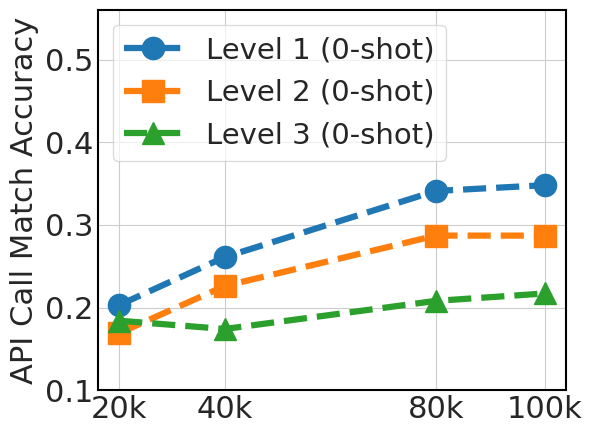

In [3]:
file_path = 'code-llama-13b-scaling.txt'
with open(file_path, 'r') as file:
    text_content = file.read()

# Extracting relevant data from the text using regular expressions
extracted_data = re.findall(r"<<train data>>: cleaned_curl/tokenized_combined_data_(\d+) <<test data>>: total_testing_cleaned_curl_level_(\d+).json.json\nNumber of testing APIs: \d+\nOverall Endpoint Match Accuracy: ([\d.]+)\nOverall API Call Match Accuracy: ([\d.]+)", text_content)

# Converting the extracted data into a structured format
data = {}
for train_size, level, endpoint_accuracy, api_accuracy in extracted_data:
    key = (int(train_size), "Level " + level)
    data[key] = {
        "endpoint_accuracy": float(endpoint_accuracy),
        "api_accuracy": float(api_accuracy)
    }

print(extracted_data)
    
# Sorting and organizing data for plotting
sorted_keys = sorted(data.keys())
train_sizes = sorted(set(train_size for train_size, _ in sorted_keys))
levels = sorted(set(level for _, level in sorted_keys))

# Preparing data for plotting
endpoint_accuracies = {level: [] for level in levels}
api_accuracies = {level: [] for level in levels}

for (train_size, level) in sorted_keys:
    accuracies = data[(train_size, level)]
    endpoint_accuracies[level].append(accuracies["endpoint_accuracy"])
    api_accuracies[level].append(accuracies["api_accuracy"])

# Setting different line styles and markers for each level
line_styles = ['--', '--', '--']
markers = ['o', 's', '^']  # Circle, square, and triangle markers

# Plotting Endpoint Match Accuracy
plt.figure(figsize=(7.5*0.85, 6*0.8))
for i, level in enumerate(levels):
    plt.plot(train_sizes, endpoint_accuracies[level], line_styles[i], marker=markers[i], label=f'{level} (0-shot)', linewidth=4.5, markersize=16)

# plt.xlabel('API Pack Training Size')
plt.ylabel('Endpoint Match Accuracy')
#plt.title('Endpoint Match Accuracy by Training Data Size and Level')
plt.xticks(train_sizes, labels=['20k', '40k', '80k', '100k'])
plt.ylim(0.1, 0.56)  # Setting y-axis from 0 to 1

plt.legend(loc='upper left', fontsize=21)
plt.show()

# Plotting API Call Match Accuracy
plt.figure(figsize=(7.5*0.85, 6*0.8))
for i, level in enumerate(levels):
    plt.plot(train_sizes, api_accuracies[level], line_styles[i], marker=markers[i], label=f'{level} (0-shot)', linewidth=4.5, markersize=16)

# plt.xlabel('API Pack Training Size')
plt.ylabel('API Call Match Accuracy')
#plt.title('API Call Match Accuracy by Training Data Size and Level')
plt.xticks(train_sizes, labels=['20k', '40k', '80k', '100k'])
plt.ylim(0.1, 0.56)  # Setting y-axis from 0 to 1

plt.legend(loc='upper left', fontsize=21)
plt.show()

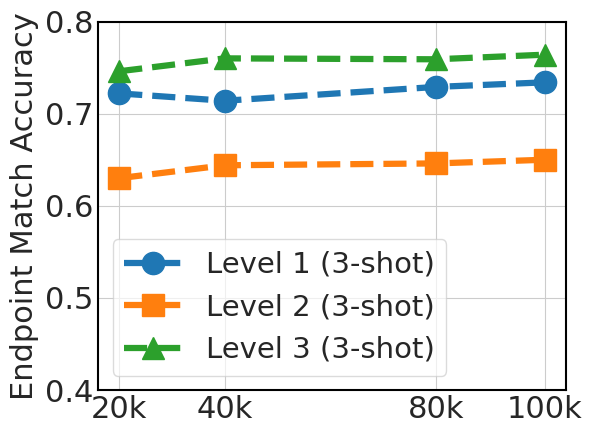

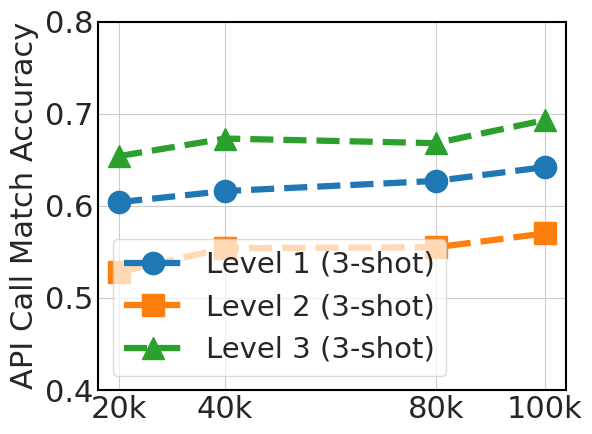

In [4]:
file_path = 'code-llama-13b-scaling.txt'
with open(file_path, 'r') as file:
    text_content = file.read()

# Extracting relevant data from the text using regular expressions
extracted_data = re.findall(r"<<train data>>: cleaned_curl/tokenized_combined_data_(\d+) <<test data>>: total_testing_cleaned_curl_level_(\d+)_retrieval_IC_3.json.json\nNumber of testing APIs: \d+\nOverall Endpoint Match Accuracy: ([\d.]+)\nOverall API Call Match Accuracy: ([\d.]+)", text_content)

# Converting the extracted data into a structured format
data = {}
for train_size, level, endpoint_accuracy, api_accuracy in extracted_data:
    key = (int(train_size), "Level " + level)
    data[key] = {
        "endpoint_accuracy": float(endpoint_accuracy),
        "api_accuracy": float(api_accuracy)
    }

# Sorting and organizing data for plotting
sorted_keys = sorted(data.keys())
train_sizes = sorted(set(train_size for train_size, _ in sorted_keys))
levels = sorted(set(level for _, level in sorted_keys))

# Preparing data for plotting
endpoint_accuracies = {level: [] for level in levels}
api_accuracies = {level: [] for level in levels}

for (train_size, level) in sorted_keys:
    accuracies = data[(train_size, level)]
    endpoint_accuracies[level].append(accuracies["endpoint_accuracy"])
    api_accuracies[level].append(accuracies["api_accuracy"])

# Setting different line styles and markers for each level
line_styles = ['--', '--', '--']
markers = ['o', 's', '^']  # Circle, square, and triangle markers

# Plotting Endpoint Match Accuracy
plt.figure(figsize=(7.5*0.85, 6*0.8))
for i, level in enumerate(levels):
    plt.plot(train_sizes, endpoint_accuracies[level], line_styles[i], marker=markers[i], label=f'{level} (3-shot)', linewidth=4.5, markersize=16)

# plt.xlabel('API Pack Training Size')
plt.ylabel('Endpoint Match Accuracy')
#plt.title('Endpoint Match Accuracy by Training Data Size and Level')
plt.xticks(train_sizes, labels=['20k', '40k', '80k', '100k'])
plt.ylim(0.4, 0.8)  # Setting y-axis from 0 to 1
plt.legend(loc='lower left', fontsize=21)
plt.show()

# Plotting API Call Match Accuracy
plt.figure(figsize=(7.5*0.85, 6*0.8))
for i, level in enumerate(levels):
    plt.plot(train_sizes, api_accuracies[level], line_styles[i], marker=markers[i], label=f'{level} (3-shot)', linewidth=4.5, markersize=16)

# plt.xlabel('API Pack Training Size')
plt.ylabel('API Call Match Accuracy')
#plt.title('API Call Match Accuracy by Training Data Size and Level')
plt.xticks(train_sizes, labels=['20k', '40k', '80k', '100k'])

plt.ylim(0.4, 0.8)  # Setting y-axis from 0 to 1
plt.legend(loc='lower left', fontsize=21)
# plt.xscale('log')
plt.show()

[('10000', '1', '0.048', '0.032'), ('10000', '2', '0.091', '0.070'), ('10000', '3', '0.105', '0.057'), ('20000', '1', '0.144', '0.103'), ('20000', '2', '0.159', '0.133'), ('20000', '3', '0.142', '0.089'), ('40000', '1', '0.251', '0.192'), ('40000', '2', '0.212', '0.180'), ('40000', '3', '0.182', '0.135'), ('80000', '1', '0.295', '0.231'), ('80000', '2', '0.242', '0.201'), ('80000', '3', '0.229', '0.195'), ('98914', '1', '0.349', '0.272'), ('98914', '2', '0.283', '0.232'), ('98914', '3', '0.230', '0.201'), ('1000000', '1', '0.772', '0.695'), ('1000000', '2', '0.538', '0.473'), ('1000000', '3', '0.448', '0.402')]


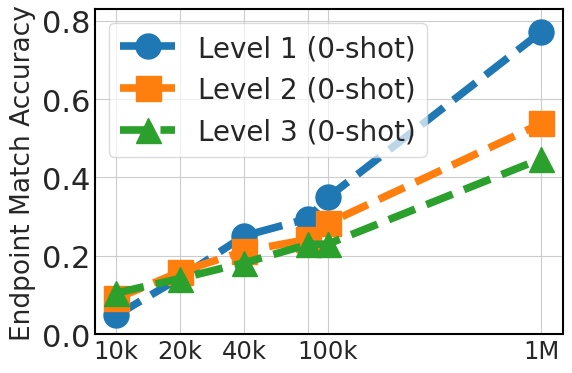

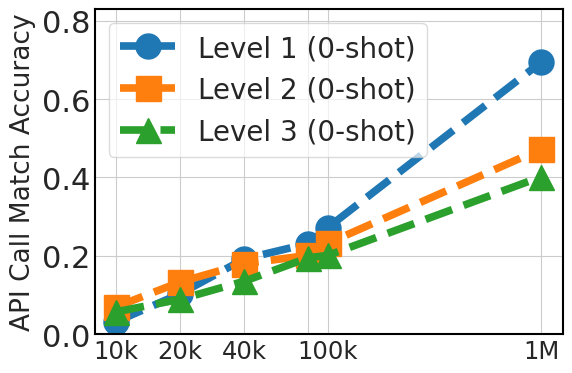

In [5]:
file_path = 'code-llama-13b-scaling-python.txt'
with open(file_path, 'r') as file:
    text_content = file.read()

# Extracting relevant data from the text using regular expressions
extracted_data = re.findall(r"<<train data>>: cleaned_python/tokenized_combined_data_(\d+) <<test data>>: total_testing_cleaned_python_level_(\d+).json.json\nNumber of testing APIs: \d+\nOverall Endpoint Match Accuracy: ([\d.]+)\nOverall API Call Match Accuracy: ([\d.]+)", text_content)

# Converting the extracted data into a structured format
data = {}
for train_size, level, endpoint_accuracy, api_accuracy in extracted_data:
    key = (int(train_size), "Level " + level)
    data[key] = {
        "endpoint_accuracy": float(endpoint_accuracy),
        "api_accuracy": float(api_accuracy)
    }

print(extracted_data)
    
# Sorting and organizing data for plotting
sorted_keys = sorted(data.keys())
train_sizes = sorted(set(train_size for train_size, _ in sorted_keys))
levels = sorted(set(level for _, level in sorted_keys))

# Preparing data for plotting
endpoint_accuracies = {level: [] for level in levels}
api_accuracies = {level: [] for level in levels}

for (train_size, level) in sorted_keys:
    accuracies = data[(train_size, level)]
    endpoint_accuracies[level].append(accuracies["endpoint_accuracy"])
    api_accuracies[level].append(accuracies["api_accuracy"])

# Setting different line styles and markers for each level
line_styles = ['--', '--', '--']
markers = ['o', 's', '^']  # Circle, square, and triangle markers

# Plotting Endpoint Match Accuracy
plt.figure(figsize=(7.5*0.825, 5.25*0.8))
for i, level in enumerate(levels):
    plt.plot(train_sizes, endpoint_accuracies[level], line_styles[i], marker=markers[i], label=f'{level} (0-shot)', linewidth=5.5, markersize=18)

# plt.xlabel('API Pack Training Size')
plt.ylabel('Endpoint Match Accuracy', fontsize=19)
#plt.title('API Call Match Accuracy by Training Data Size and Level')
plt.xscale('log')
plt.xticks(train_sizes, labels=['10k', '20k', '40k', '', '100k', '1M'], fontsize=17.5)
plt.ylim(0, 0.83)  # Setting y-axis from 0 to 1

plt.legend(loc='upper left', fontsize=20)
plt.show()

# Plotting API Call Match Accuracy
plt.figure(figsize=(7.5*0.825, 5.25*0.8))
for i, level in enumerate(levels):
    plt.plot(train_sizes, api_accuracies[level], line_styles[i], marker=markers[i], label=f'{level} (0-shot)', linewidth=5.5, markersize=18)

# plt.xlabel('API Pack Training Size')
plt.ylabel('API Call Match Accuracy', fontsize=19)
#plt.title('API Call Match Accuracy by Training Data Size and Level')
plt.xscale('log')
plt.xticks(train_sizes, labels=['10k', '20k', '40k', '', '100k', '1M'], fontsize=17.5)
plt.ylim(0, 0.83)  # Setting y-axis from 0 to 1

plt.legend(loc='upper left', fontsize=20)
plt.show()

[('10000', '1', '0.616', '0.534'), ('10000', '2', '0.540', '0.484'), ('10000', '3', '0.562', '0.496'), ('20000', '1', '0.635', '0.555'), ('20000', '2', '0.568', '0.514'), ('20000', '3', '0.561', '0.491'), ('40000', '1', '0.648', '0.571'), ('40000', '2', '0.554', '0.498'), ('40000', '3', '0.590', '0.527'), ('80000', '1', '0.640', '0.565'), ('80000', '2', '0.573', '0.514'), ('80000', '3', '0.612', '0.545'), ('98914', '1', '0.654', '0.576'), ('98914', '2', '0.594', '0.533'), ('98914', '3', '0.611', '0.548'), ('1000000', '1', '0.744', '0.693'), ('1000000', '2', '0.573', '0.519'), ('1000000', '3', '0.640', '0.561')]


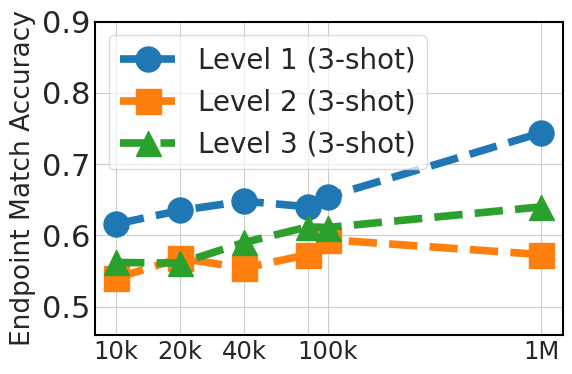

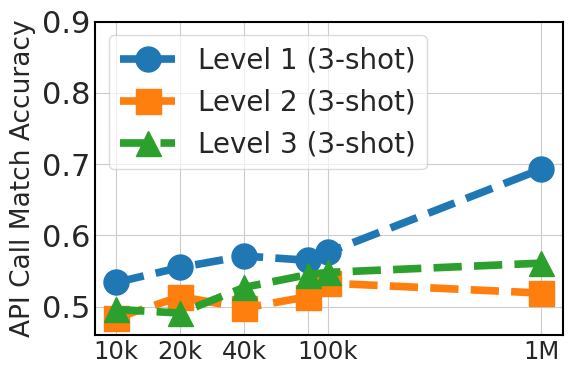

In [6]:
file_path = 'code-llama-13b-scaling-python.txt'
with open(file_path, 'r') as file:
    text_content = file.read()

# Extracting relevant data from the text using regular expressions
extracted_data = re.findall(r"<<train data>>: cleaned_python/tokenized_combined_data_(\d+) <<test data>>: total_testing_cleaned_python_level_(\d+)_retrieval_IC_3.json.json\nNumber of testing APIs: \d+\nOverall Endpoint Match Accuracy: ([\d.]+)\nOverall API Call Match Accuracy: ([\d.]+)", text_content)

# Converting the extracted data into a structured format
data = {}
for train_size, level, endpoint_accuracy, api_accuracy in extracted_data:
    key = (int(train_size), "Level " + level)
    data[key] = {
        "endpoint_accuracy": float(endpoint_accuracy),
        "api_accuracy": float(api_accuracy)
    }

print(extracted_data)
    
# Sorting and organizing data for plotting
sorted_keys = sorted(data.keys())
train_sizes = sorted(set(train_size for train_size, _ in sorted_keys))
levels = sorted(set(level for _, level in sorted_keys))

# Preparing data for plotting
endpoint_accuracies = {level: [] for level in levels}
api_accuracies = {level: [] for level in levels}

for (train_size, level) in sorted_keys:
    accuracies = data[(train_size, level)]
    endpoint_accuracies[level].append(accuracies["endpoint_accuracy"])
    api_accuracies[level].append(accuracies["api_accuracy"])

# Setting different line styles and markers for each level
line_styles = ['--', '--', '--']
markers = ['o', 's', '^']  # Circle, square, and triangle markers

# Plotting Endpoint Match Accuracy
plt.figure(figsize=(7.5*0.825, 5.25*0.8))
for i, level in enumerate(levels):
    plt.plot(train_sizes, endpoint_accuracies[level], line_styles[i], marker=markers[i], label=f'{level} (3-shot)', linewidth=5.5, markersize=18)

# plt.xlabel('API Pack Training Size')
plt.ylabel('Endpoint Match Accuracy', fontsize=19)
#plt.title('API Call Match Accuracy by Training Data Size and Level')
plt.xscale('log')
plt.xticks(train_sizes, labels=['10k', '20k', '40k', '', '100k', '1M'], fontsize=17.5)
plt.ylim(0.42+0.04, 0.82+0.08)  # Setting y-axis from 0 to 1

plt.legend(loc='upper left', fontsize=20)
plt.show()

# Plotting API Call Match Accuracy
plt.figure(figsize=(7.5*0.825, 5.25*0.8))
for i, level in enumerate(levels):
    plt.plot(train_sizes, api_accuracies[level], line_styles[i], marker=markers[i], label=f'{level} (3-shot)', linewidth=5.5, markersize=18)

# plt.xlabel('API Pack Training Size')
plt.ylabel('API Call Match Accuracy', fontsize=19)
#plt.title('API Call Match Accuracy by Training Data Size and Level')
plt.xscale('log')
plt.xticks(train_sizes, labels=['10k', '20k', '40k', '', '100k', '1M'], fontsize=17.5)
plt.ylim(0.42+0.04, 0.82+0.08)  # Setting y-axis from 0 to 1

plt.legend(loc='upper left', fontsize=20)
plt.show()